In [1]:
library(ape)


tree <- read.tree("~/workspace/genome_data/annotations/s_aureus/gene_sequences/esxd_gene/tree.nwk")
tree


Phylogenetic tree with 248 tips and 247 internal nodes.

Tip labels:
  AH21F063, AH20F047, AH19H051, AH19L027, AH20J039, AH18L029, ...

Rooted; includes branch length(s).

In [2]:
library(data.table)


pheno <- fread("/home/vmadmin/workspace/ehr_data/data/full_cohort/tube_id_mortality.pheno", data.table = FALSE)
pheno_vector <- setNames(pheno$death_30_day, pheno$tube_code)
pheno_vector

AH19I003  AH21E085 ALF22B136  AH20B011 ALF23D002  AH21H067  AH19H079  AH20H033 
        0         0         0         0         0         0         0         0 
 AH22A034  AH21G070  AH20B042  AH19H073  AH19G065  AH20I016  AH19K042  AH21A081 
        0         0         0         0         0         0         0         0 
ALF22L085  AH21C049  AH19H033  AH21G058  AH21K008  AH22A036 ALF23C169  AH21E065 
        0         0         0         0         0         0         0         0 
 AH21H066  AH21J039 ALF22E016  AH21I025   KPN1956 ALF22B032  AH21L121 ALF23C052 
        0         0         0         0         0         0         0         1 
 AH21E052 ALF22G030 ALF22G080  AH21K025 ALF23A050 ALF23A051 ALF23B068  AH20K052 
        0         0         1         0         0         0         0         0 
 AH21I046  AH21I051  AH21I091 ALF22C048 ALF22D043 ALF22L150 ALF23A135  AH21I029 
        0         0         0         0         0         0         0         0 
 AH21L060 ALF22E077  AH21L124 ALF23B110 ALF22H033  AH20I033  AH20I034  AH20I035 
        0         1         0         0         0         0         0         0 
ALF22D097  AH20I005 ALF22B049  AH20J009  AH21B002   KPN2214  AH20A043  AH21G065 
        0         0         0         0         1         0         0         0 
 AH21I079  AH21E048  AH18J038 ALF22I001  AH21K006  AH21K007 ALF22F150  AH20A009 
        0         0         1         0         0         0         0         0 
 AH20A010 ALF22K049  AH18J074  AH22A005 ALF22F007 ALF23C126 ALF23C127  AH19I053 
        0         0         0         0         0         0         0         0 
 AH22A149  AH21B118 ALF22F167  AH19L006 ALF22L136  AH20A058 ALF22H066  AH21K089 
        0         0         0         0         0         0         0         0 
 AH19K059 ALF22J074  AH18J019  AH19J067 ALF22K137  AH21G023  AH20C008 ALF23B001 
        0         0         0         0         0         1         0         0 
 AH20B070  AH21H017  AH21I015  AH21J013  AH20H014 ALF22K050  AH20B012 ALF22G152 
        1         0         1         0         0         0         0         1 
 AH20G072  AH19H056  AH19H057  AH20F030  AH19H010 ALF22L090 ALF22H038  AH18J066 
        0         0         0         0         0         1         0         0 
 AH20B064  AH20L018  AH21G024  AH19K005  AH21L073 ALF22I092  AH21H055  AH20G075 
        0         0         0         0         1         0         0         0 
 AH21D051  AH21B148 ALF22H061  AH20J001  AH18J082 ALF22E083  AH19I063 ALF22F113 
        0         0         0         0         0         0         0         1 
 AH21G053 ALF23A134 ALF22E055  AH20A054  AH18J052  AH20H050 ALF23A009   KPN2153 
        0         0         0         0         0         0         0         0 
ALF22I128 ALF22H131  AH20B014  AH21A022  AH21A083  AH19C004 ALF23C089  AH20D057 
        0         0         0         0         0         0         0         0 
ALF22L144  AH19J022 ALF22I124 ALF22J016  AH20K047  AH21C064  AH21I027  AH20J052 
        0         0         0         0         0         0         0         0 
ALF22J077  AH21G019 ALF22C121  AH21G056  AH21I070  AH20H048 ALF22L134 ALF22K051 
        0         0         0         0         0         0         0         0 
ALF22L068  AH21E004  AH21I076  AH19L016  AH21J072 ALF22F126 ALF23A076 ALF22C012 
        0         0         0         0         0         0         0         0 
ALF22D093 ALF22G173 ALF23B065   KPN1974  AH19F058  AH20L058 ALF23C074 ALF22D046 
        0         0         0         0         0         1         0         0 
 AH21K015  AH20L069 ALF22L151 ALF23B007 ALF22J027  AH21K003 ALF22F078  AH19I020 
        0         0         0         0         0         0         0         0 
 AH19B003  AH20B073  AH19H020 ALF22C081  AH20B082  AH20E034  AH20F038  AH20I048 
        0         1         0         0         0         0         0         0 
 AH20K039   KPN2022 ALF22F047 ALF22I143  AH21G069  AH20E012  AH20I057  AH21C022 
        0         0         0   

In [3]:
library(vcfR)
library(adegenet)
library(data.table)


vcf <- read.vcfR("~/workspace/genome_data/annotations/s_aureus/gene_sequences/esxd_gene/variants.vcf")
genlight_obj <- vcfR2genlight(vcf)
snp_matrix <- as.matrix(genlight_obj)
snp_matrix[is.na(snp_matrix)] <- NA
snp_df <- data.frame(SampleID = indNames(genlight_obj), snp_matrix, check.names = FALSE)
rownames(snp_df) <- snp_df[, 1]
snps <- snp_df[, -1]


   *****       ***   vcfR   ***       *****
   This is vcfR 1.15.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****


Loading required package: ade4


   /// adegenet 2.1.11 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()





Scanning file to determine attributes.
File attributes:
  meta lines: 3
  header_line: 4
  variant count: 23
  column count: 257
Meta line 3 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 23
  Character matrix gt cols: 257
  skip: 0
  nrows: 23
  row_num: 0
Processed variant: 23
All variants processed


In [4]:
common_samples <- Reduce(intersect, list(tree$tip.label, rownames(snps), names(pheno_vector)))

In [5]:
tree <- keep.tip(tree, common_samples)
snps <- snps[common_samples, ]
pheno_vector <- pheno_vector[common_samples]


Attaching package: ‘treeWAS’


The following objects are masked _by_ ‘.GlobalEnv’:

    snps, tree




Setting 3 negative branch lengths to zero.
[1] "treeWAS snps sim done @ 2025-07-23 09:53:26.499297"
[1] "Reconstructions completed @ 2025-07-23 09:53:26.545386"
[1] "Started running terminal test @ 2025-07-23 09:53:26.545775"
[1] "Real data scores completed for terminal test @ 2025-07-23 09:53:26.546368"
[1] "Simulated data scores completed for terminal test @ 2025-07-23 09:53:26.547325"
[1] "Started running simultaneous test @ 2025-07-23 09:53:26.54752"
[1] "Real data scores completed for simultaneous test @ 2025-07-23 09:53:26.548094"
[1] "Simulated data scores completed for simultaneous test @ 2025-07-23 09:53:26.549282"
[1] "Started running subsequent test @ 2025-07-23 09:53:26.549461"
[1] "Real data scores completed for subsequent test @ 2025-07-23 09:53:26.550146"
[1] "Simulated data scores completed for subsequent test @ 2025-07-23 09:53:26.552662"
[1] "Finished running terminal test @ 2025-07-23 09:53:26.555807"
[1] "Finished running simultaneous test @ 2025-07-23 09:53:26.5565

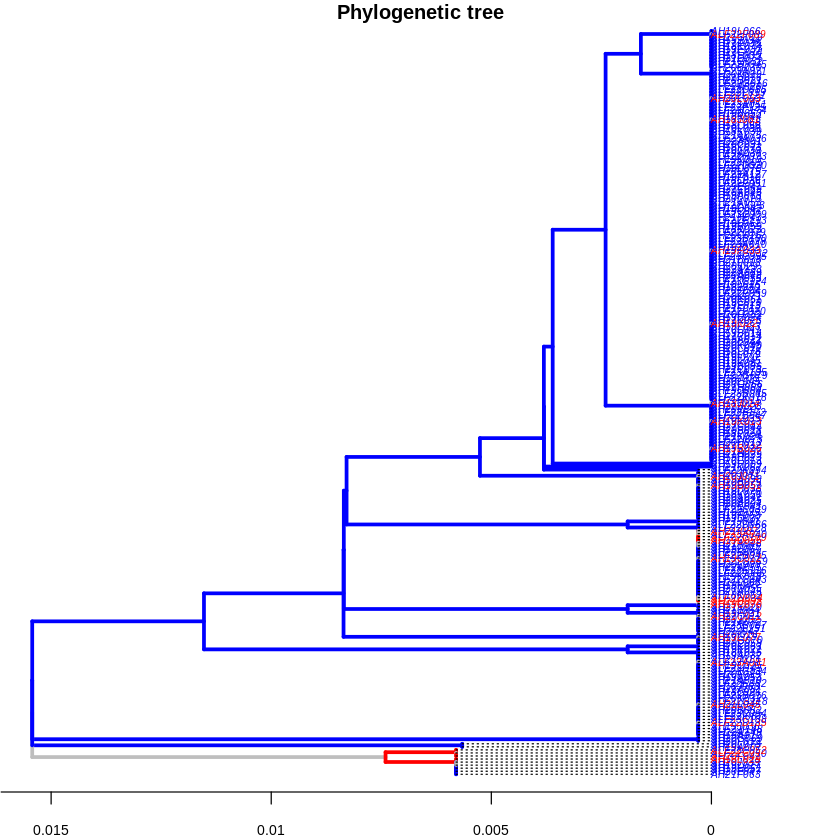

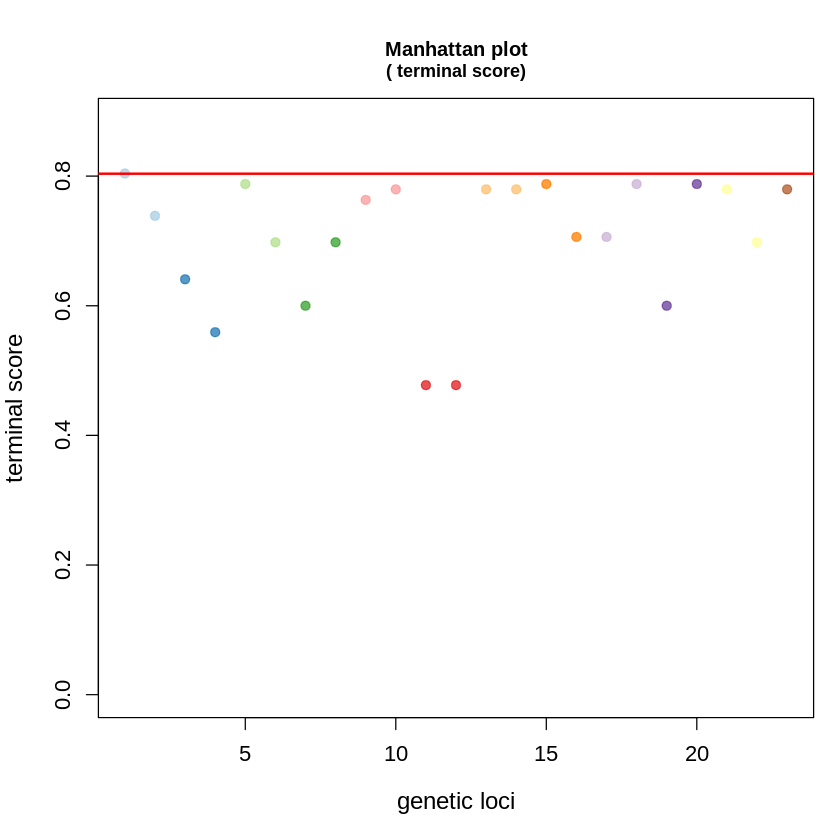

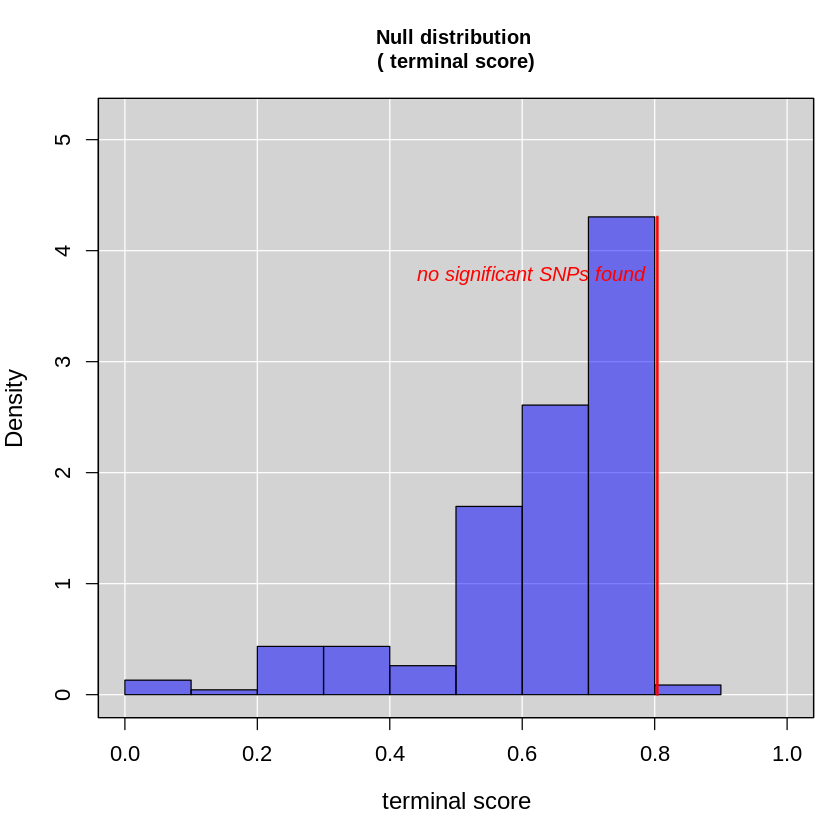

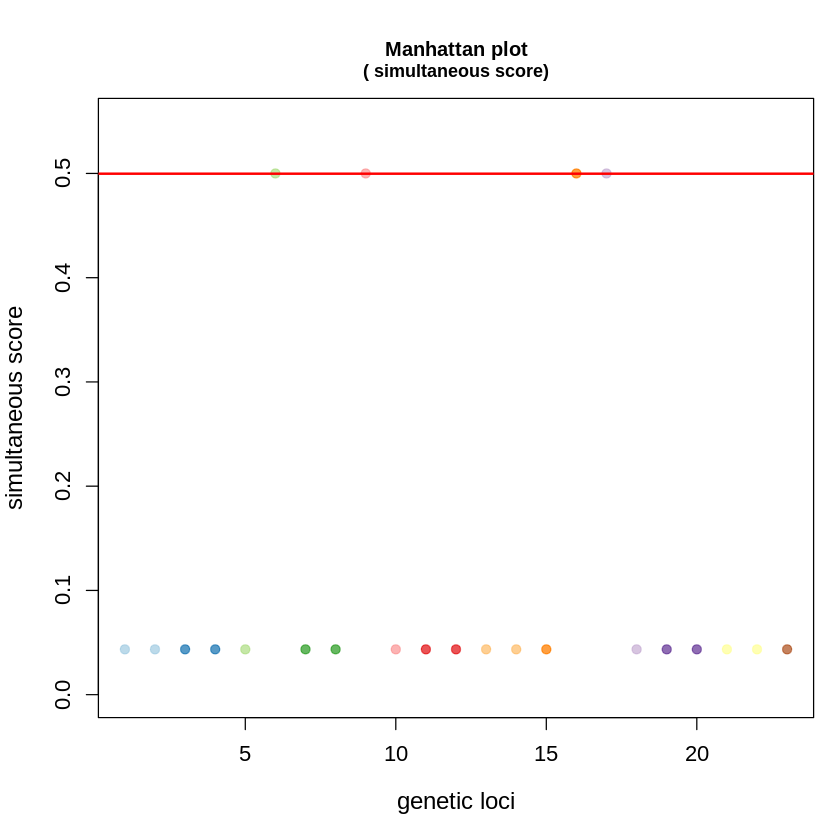

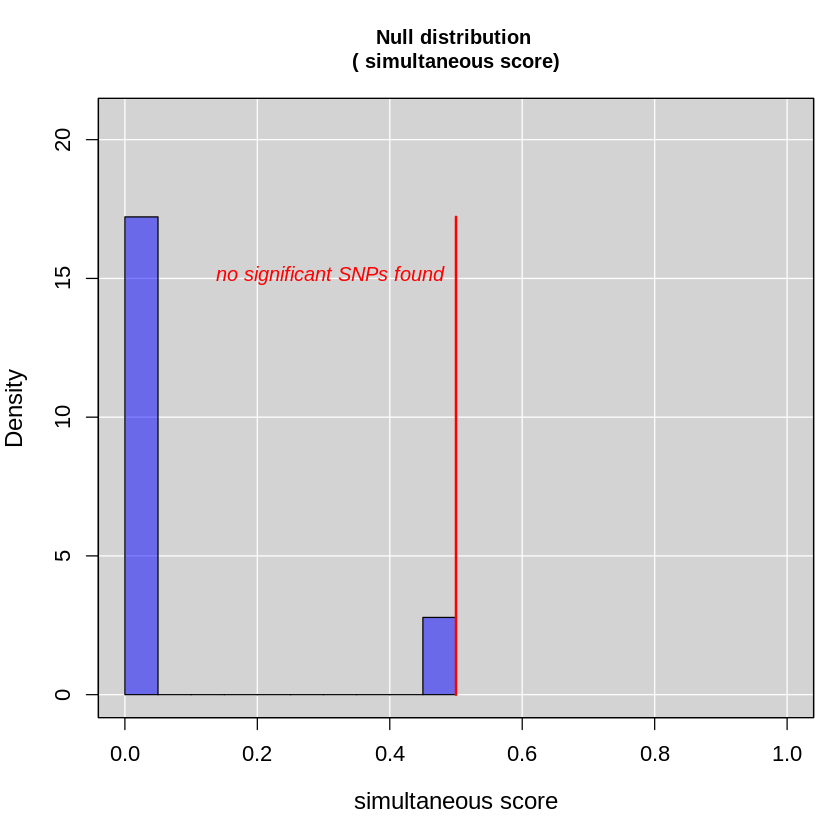

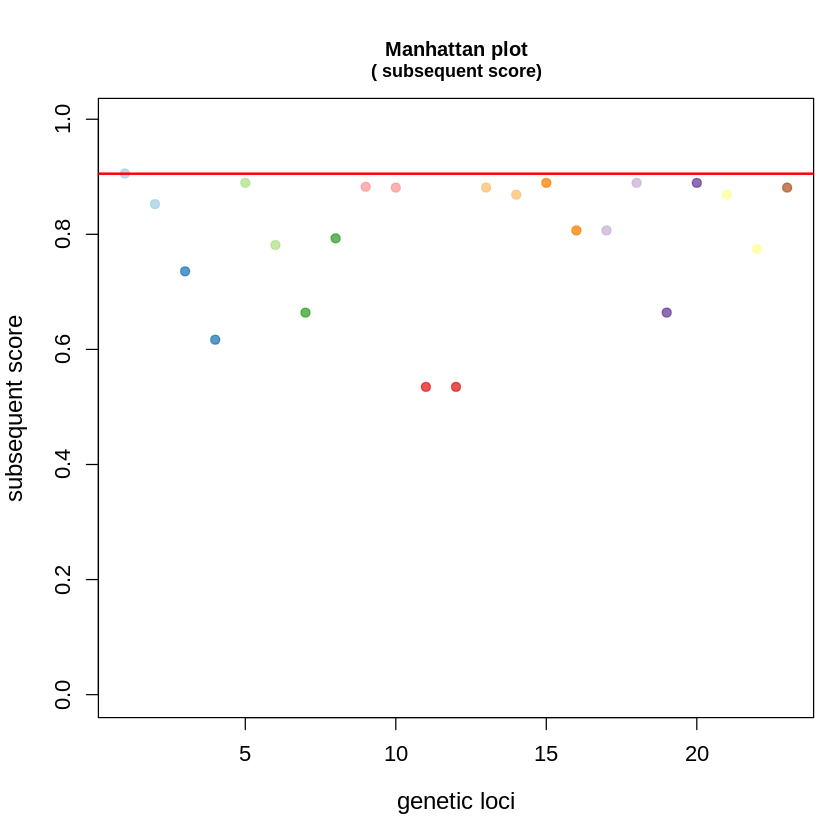

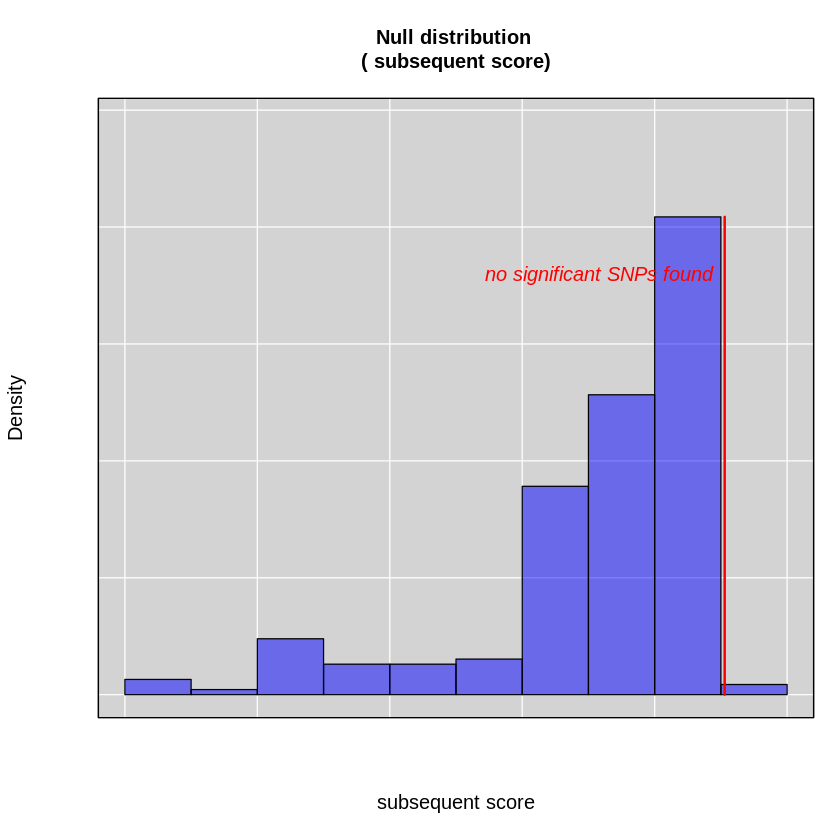

In [6]:
library(treeWAS)


par(bg = "white")
tw_result <- treeWAS(snps = snps,
                     phen = pheno_vector,
                     tree = tree,
                     p.value.correct = "fdr")

In [7]:
tw_result

	#################### 
	## treeWAS output ## 
	#################### 
	 
	#################### 
	## All findings:  ## 
	#################### 
Number of significant loci: [1] 0
	 
	######################## 
	## Findings by test:  ## 
	######################## 
	 ####################  
	 ##  terminal test ## 
	 ####################  
Number of significant loci: 
[1] 0
Significance threshold: 
     100% 
0.8040816 
	 
	 ########################  
	 ##  simultaneous test ## 
	 ########################  
Number of significant loci: 
[1] 0
Significance threshold: 
100% 
 0.5 
	 
	 ######################  
	 ##  subsequent test ## 
	 ######################  
Number of significant loci: 
[1] 0
Significance threshold: 
     100% 
0.9057377 
	 